# Simple linear regression


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

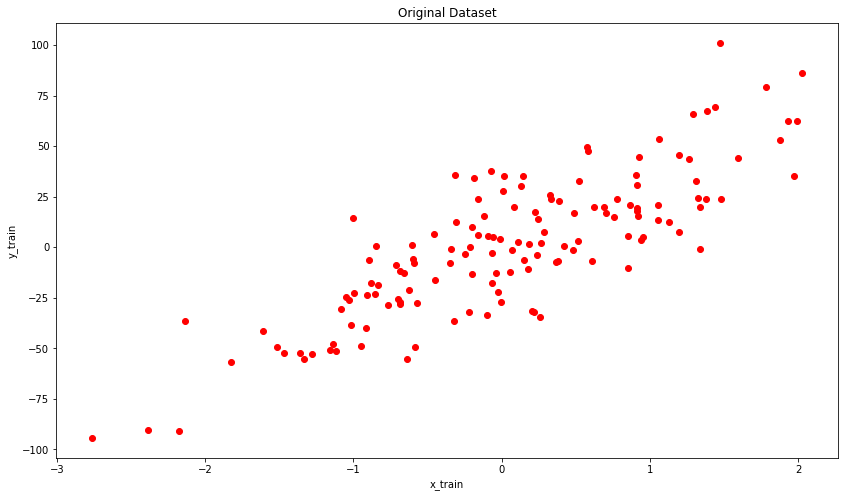

In [5]:
X, Y = datasets.make_regression(n_samples=200,
                               n_features=1,
                               n_informative=1,
                               n_targets=1,
                               noise= 20.0)
x_train,x_test,y_train,y_test= train_test_split(X, Y , test_size=0.3)
c=y_train
plt.figure(figsize=(14,8))
plt.title('Original Dataset')
plt.xlabel('x_train')
plt.ylabel('y_train')
y = y_train.reshape(-1,1)
plt.plot(x_train ,y,'ro')
plt.show()

In [6]:
y_train=y_train.reshape(-1,1)
n_input=x_train.shape[1] #feature_number
n_outputs=1
m=x_train.shape[0]   #X(200,2)
learning_rate=0.01
n_epoch=500

In [11]:
#initialization
x_tensor=tf.placeholder(name='x_tensor',dtype=tf.float32,shape=[None,n_input])  #(200,1)
y_tensor=tf.placeholder(name='y_tensor',dtype=tf.float32,shape=[None,1])   #(200,1)
x_tensor.shape
y_tensor.shape
weight=tf.Variable(tf.random_normal(shape=(n_input,n_outputs),mean=0.0,stddev=0.01),name='weight')   #(1,1)
bias=tf.Variable(tf.zeros(shape=([n_outputs]),dtype=tf.float32))  #(1,)
#create model
model=tf.add(tf.matmul(x_tensor,weight),bias)

# mean squared error loss function 
loss_op=(1/2)*tf.reduce_mean(name='loss',input_tensor= tf.pow((tf.subtract(y_tensor,model)),2))
#training using gradient descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

#variables initaialization
init=tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    loss_values=[]  #store loss value each epoch
    for i in range(n_epoch):
        loss_value,_=sess.run([loss_op,optimizer],feed_dict={x_tensor:x_train ,y_tensor:y_train})
        loss_values.append(loss_value)
        
       # print(f'loss value : {loss_value} , accuracy value : {accuracy_value} ')

    weight,bias= sess.run([weight,bias])
    model=x_train*weight+bias     
    
print("weight = \n", weight, '\n bias =\n' , bias , '\n loss:',loss_value )  


weight = 
 [[29.792158]] 
 bias =
 [-0.50866] 
 loss: 190.18745


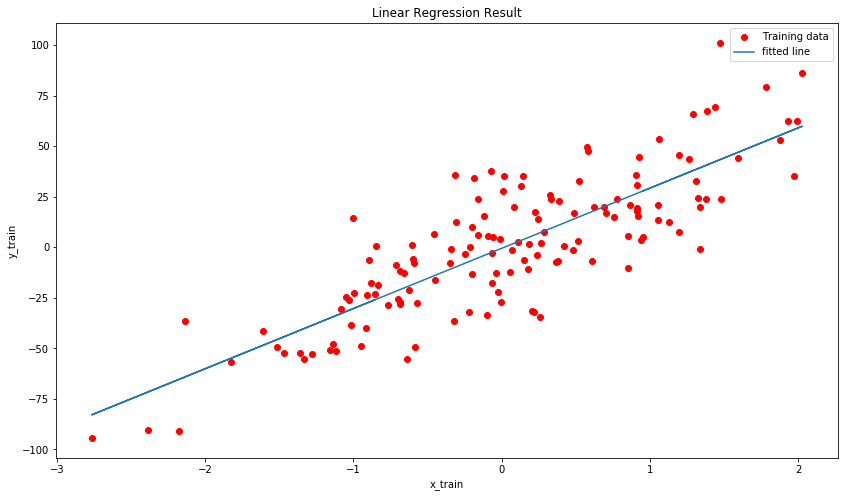

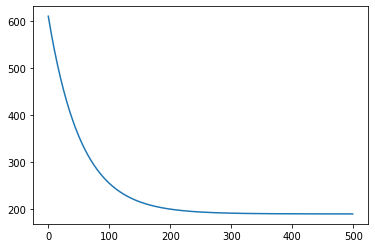

In [12]:
# plot the results 
plt.figure(figsize=(14,8))
plt.title('Linear Regression Result') 
plt.xlabel('x_train')
plt.ylabel('y_train')
y = y_train.reshape(-1,1)
plt.plot(x_train ,y,'ro',label='Training data')
plt.plot(x_train, model , label ='fitted line') 
plt.legend() 
plt.show() 


#plot loss func 
plt.figure(2)
plt.plot(loss_values)
plt.show()

MSE: 1125.12


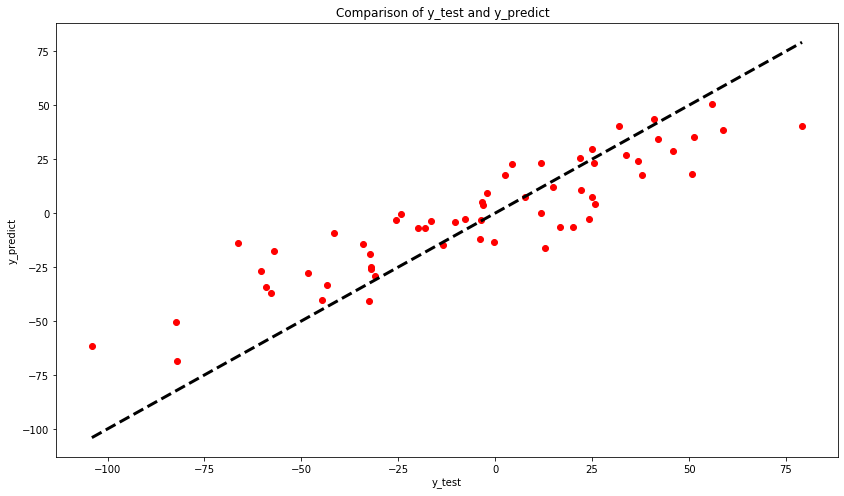

<Figure size 432x288 with 0 Axes>

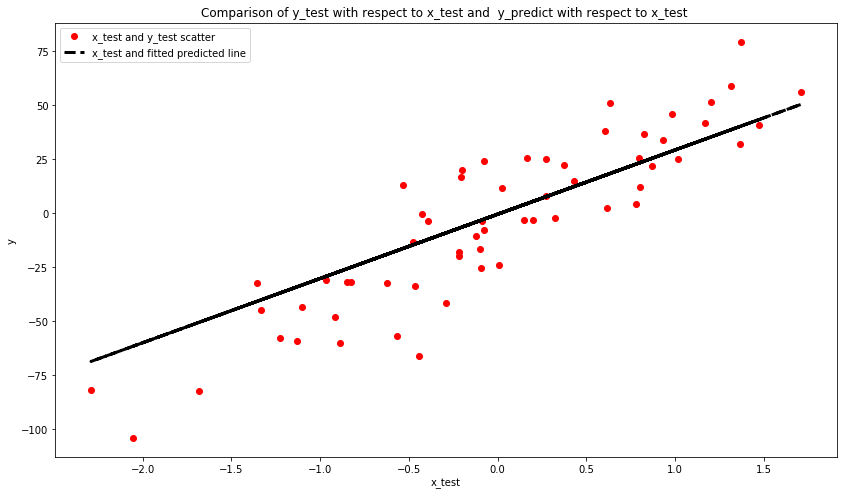

In [22]:
#calculation of mean squared error for our regression model
model1=tf.add(tf.matmul(x_tensor,weight),bias)
sess1=tf.Session()
sess1.run(init)
y_predict = sess1.run(model1, feed_dict={x_tensor:x_test})
#mse1 = tf.metrics.mean_squared_error(labels=y_test, predictions=y_predict)
mse = (1/2.0)*tf.reduce_mean(tf.square(y_predict - y_test))
print('MSE: %.2f' % sess1.run(mse)   ) 
sess1.close()


# method 1 for comparison of y_test and y_predict + plot  y=x for showing errors
plt.figure(figsize=(14,8))
plt.title('Comparison of y_test and y_predict  ') 
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.plot(y_test ,y_predict,'ro')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()],'k--', lw=3) 
plt.show() 


#method 2 for comparison of y_test and y_predict
plt.figure(2)
plt.figure(figsize=(14,8))
plt.title('Comparison of y_test with respect to x_test and  y_predict with respect to x_test ') 
plt.xlabel('x_test')
plt.ylabel('y')
plt.plot(x_test ,y_test,'ro',lw=2,label='x_test and y_test scatter')
model2 = (x_test*weight)+bias
plt.plot(x_test, model2 ,'k--', lw=3, label='x_test and fitted predicted line' ) 
plt.legend()
plt.show() 
